# Walmart Sales Exploratory Data Analysis

Dataset used: https://www.kaggle.com/datasets/ankitrajmishra/walmart

This dataset shows transactional and operational data across multiple stores, It includes detailed information on transactions, customer demographics, product details, inventory levels, promotional activities, and external factors like weather and holidays.


Business Problem: Walmart is facing challenges in maintaining consistent sales performance across its stores and optimizing its inventory and promotional strategies. Identify underperforming stores, analyze the impact of promotions, and improve inventory management. Also, understand customer behaviour.

## Questions 

1. WHAT IS THE TOTAL SALES VOLUME ACROSS ALL WALMART STORES?
2. WHAT IS THE AVERAGE UNIT PRICE OF ALL PRODUCTS SOLD?
3. WHICH STORES ARE UNDERPERFORMING IN TERMS OF SALES VOLUME?
4. WHAT COUNT OF TRANSACTIONS INVOLVED IN PROMOTIONS?
5. WHAT IS THE TOTAL REVENUE GENERATED FROM SALES DURING PROMOTIONAL EVENTS?
6. WHICH PRODUCT CATEGORIES SEE THE LARGEST INCREASE IN DEMAND DURING HOLIDAYS?
7. WHAT IS THE CORRELATION BETWEEN WEATHER CONDITIONS AND SALES PERFORMANCE?
8. HOW DOES CUSTOMER LOYALTY LEVEL AFFECT PURCHASING PATTERNS?
9. CALCULATE THE MONTHLY SALES AND FIND OUT THE TRENDS.
10. WHICH PRODUCT HAS THE BEST PERFORMANCE IN TERMS OF VOLUME?

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv('Walmart_Sales.csv')
df.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,3/31/2024 21:46,3,"Miami, FL",...,Silver,Credit Card,True,NaN,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,7/28/2024 12:45,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,6/10/2024 4:55,1,"Los Angeles, CA",...,Platinum,Cash,False,NaN,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,8/15/2024 1:03,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,9/13/2024 0:45,6,"Chicago, IL",...,Bronze,Digital Wallet,False,NaN,Sunny,False,Thursday,True,287,469


In [6]:
#columns
df.columns

Index(['transaction_id', 'customer_id', 'product_id', 'product_name',
       'category', 'quantity_sold', 'unit_price', 'transaction_date',
       'store_id', 'store_location', 'inventory_level', 'reorder_point',
       'reorder_quantity', 'supplier_id', 'supplier_lead_time', 'customer_age',
       'customer_gender', 'customer_income', 'customer_loyalty_level',
       'payment_method', 'promotion_applied', 'promotion_type',
       'weather_conditions', 'holiday_indicator', 'weekday',
       'stockout_indicator', 'forecasted_demand', 'actual_demand'],
      dtype='object')

In [11]:
df.dtypes

transaction_id              int64
customer_id                 int64
product_id                  int64
product_name               object
category                   object
quantity_sold               int64
unit_price                float64
transaction_date           object
store_id                    int64
store_location             object
inventory_level             int64
reorder_point               int64
reorder_quantity            int64
supplier_id                 int64
supplier_lead_time          int64
customer_age                int64
customer_gender            object
customer_income           float64
customer_loyalty_level     object
payment_method             object
promotion_applied            bool
promotion_type             object
weather_conditions         object
holiday_indicator            bool
weekday                    object
stockout_indicator           bool
forecasted_demand           int64
actual_demand               int64
dtype: object

In [13]:
#df info
print(df.size)
print(df.shape)

140000
(5000, 28)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   product_id              5000 non-null   int64  
 3   product_name            5000 non-null   object 
 4   category                5000 non-null   object 
 5   quantity_sold           5000 non-null   int64  
 6   unit_price              5000 non-null   float64
 7   transaction_date        5000 non-null   object 
 8   store_id                5000 non-null   int64  
 9   store_location          5000 non-null   object 
 10  inventory_level         5000 non-null   int64  
 11  reorder_point           5000 non-null   int64  
 12  reorder_quantity        5000 non-null   int64  
 13  supplier_id             5000 non-null   int64  
 14  supplier_lead_time      5000 non-null   

In [22]:
df.isnull().sum()

transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64

In [24]:
df['promotion_type'].unique()

array([nan, 'Percentage Discount', 'BOGO'], dtype=object)

In [3]:
#For now replace Nan with 'None' (No Discounts applied)

df['promotion_type'] = df['promotion_type'].fillna('None')

In [29]:
df['promotion_type'].isnull().sum()

np.int64(0)

In [30]:
df.describe()

,transaction_id,customer_id,product_id,quantity_sold,unit_price,store_id,inventory_level,reorder_point,reorder_quantity,supplier_id,supplier_lead_time,customer_age,customer_income,forecasted_demand,actual_demand
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,5542.497200,551.233400,2.982800,1023.467294,10.525000,253.121800,99.788000,200.517000,300.12560,5.523000,44.124000,70041.627846,297.134000,299.08840
std,1443.520003,2582.126997,258.826606,1.419474,559.614242,5.786888,142.885456,29.132387,58.257381,116.39486,2.863549,15.329358,29053.371736,115.568806,121.68078
min,1.000000,1001.000000,100.000000,1.000000,50.100000,1.000000,0.000000,50.000000,100.000000,100.00000,1.000000,18.000000,20005.340000,100.000000,90.00000
25%,1250.750000,3279.000000,322.000000,2.000000,537.775000,5.000000,130.000000,75.000000,150.750000,199.00000,3.000000,31.000000,44865.417500,195.000000,194.00000
50%,2500.500000,5558.000000,559.000000,3.000000,1029.175000,11.000000,253.000000,100.000000,200.500000,299.00000,6.000000,44.000000,70188.290000,297.500000,299.00000
75%,3750.250000,7767.250000,776.000000,4.000000,1506.307500,16.000000,377.250000,125.000000,251.000000,405.00000,8.000000,58.000000,95395.872500,395.000000,404.00000
max,5000.000000,9998.000000,999.000000,5.000000,1999.850000,20.000000,500.000000,150.000000,300.000000,500.00000,10.000000,70.000000,119999.780000,500.000000,510.00000


## EDA

##### 1. WHAT IS THE TOTAL SALES VOLUME ACROSS ALL WALMART STORES?

In [4]:
# Use column 'quantity_sold'

total_sales = df['quantity_sold'].sum()
print("Total Sales volume across all Walmart Stores is" ,total_sales)

Total Sales volume across all Walmart Stores is 14914


##### WHAT IS THE AVERAGE UNIT PRICE OF ALL PRODUCTS SOLD?

In [11]:
average_unit_price = df.groupby('product_name')['unit_price'].mean().reset_index()
average_unit_price

,product_name,unit_price
0,Camera,1015.638312
1,Fridge,993.185954
2,Headphones,1022.561726
3,Laptop,1018.981159
4,Smartphone,1038.293276
5,TV,1052.523066
6,Tablet,996.608253
7,Washing Machine,1052.249837


[Text(0, 0, '1015.64'),
 Text(0, 0, '993.19'),
 Text(0, 0, '1022.56'),
 Text(0, 0, '1018.98'),
 Text(0, 0, '1038.29'),
 Text(0, 0, '1052.52'),
 Text(0, 0, '996.61'),
 Text(0, 0, '1052.25')]

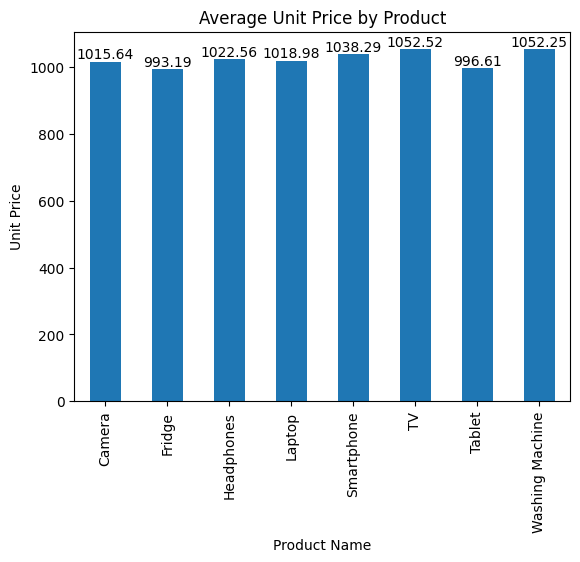

In [23]:
#Visualization
ax = average_unit_price.plot(kind='bar',x='product_name', y='unit_price',legend=False,title='Average Unit Price by Product')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
ax.bar_label(ax.containers[0], fmt='%.2f')

##### 3. WHICH STORES ARE UNDERPERFORMING IN TERMS OF SALES VOLUME?

In [43]:
store_sales = df.groupby('store_id')['quantity_sold'].sum().reset_index()
# median threshold
threshold = store_sales['quantity_sold'].median()
underperforming_stores = store_sales[store_sales['quantity_sold'] < threshold]
print('Underperformig Stores')
print(underperforming_stores)

Underperformig Stores
    store_id  quantity_sold
2          3            732
3          4            685
5          6            658
6          7            713
11        12            714
13        14            713
15        16            738
16        17            740
17        18            730


[Text(0, 0, '732'),
 Text(0, 0, '685'),
 Text(0, 0, '658'),
 Text(0, 0, '713'),
 Text(0, 0, '714'),
 Text(0, 0, '713'),
 Text(0, 0, '738'),
 Text(0, 0, '740'),
 Text(0, 0, '730')]

<Figure size 1000x800 with 0 Axes>

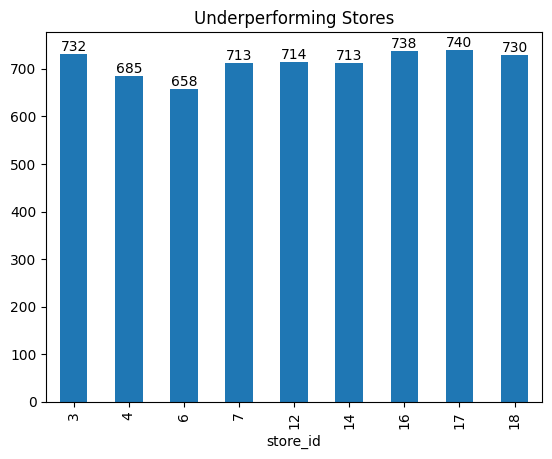

In [53]:
#Visualize
plt.figure(figsize=(10, 8))
ax = underperforming_stores.plot(kind = 'bar', x='store_id',y='quantity_sold', title='Underperforming Stores', legend = False)
ax.bar_label(ax.containers[0])

##### 4. WHAT COUNT OF TRANSACTIONS INVOLVED IN PROMOTIONS?

   promotion_applied  count
0               True   2607
1              False   2393


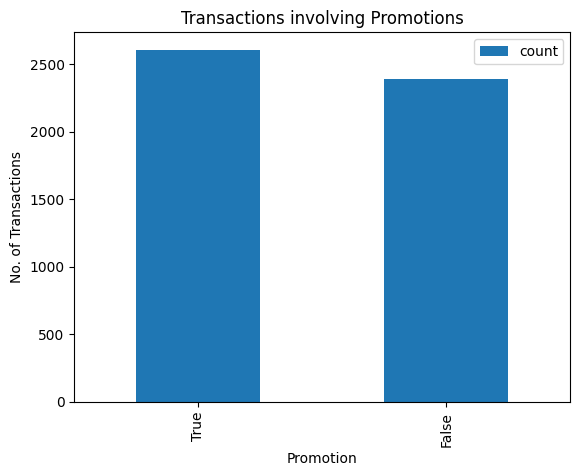

In [78]:
ax = df['promotion_applied'].value_counts().reset_index()
ax.plot(kind = 'bar', x='promotion_applied',y='count', title = 'Transactions involving Promotions')
plt.xlabel('Promotion')
plt.ylabel('No. of Transactions')
print(ax)

##### 5. WHAT IS THE TOTAL REVENUE GENERATED FROM SALES DURING PROMOTIONAL EVENTS?

In [98]:
# Creating a new DataFrame with necessary columns
df2 = df[['promotion_applied', 'quantity_sold', 'unit_price']]
df2['revenue'] = df2['quantity_sold'] * df2['unit_price']
revenue_during_promotion = df2[df2['promotion_applied'] == True]['revenue'].sum()
print("Total revenue generated during promotional events:" , revenue_during_promotion)

Total revenue generated during promotional events: 8062411.030000001


C:\Users\rejin\AppData\Local\Temp\ipykernel_11584\2412240868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['revenue'] = df2['quantity_sold'] * df2['unit_price']


##### 6. WHICH PRODUCT CATEGORIES SEE THE LARGEST INCREASE IN DEMAND DURING HOLIDAYS?

[Text(0, 0, '3576'), Text(0, 0, '3880')]

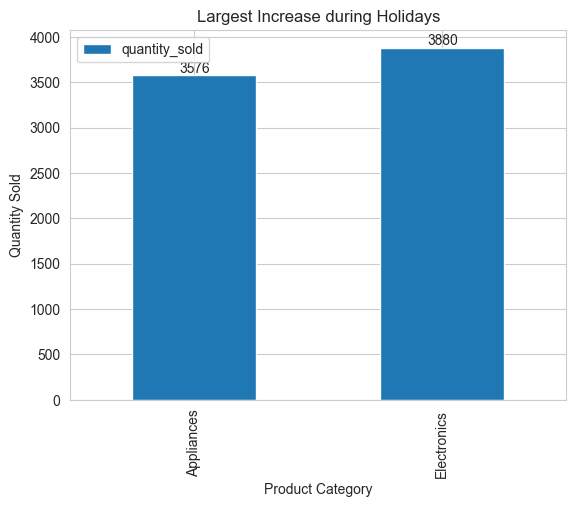

In [136]:
df2 = df[df['holiday_indicator'] == True]
product_cat = df2.groupby('category')['quantity_sold'].sum().reset_index()
ax = product_cat.plot(kind='bar',x='category',y='quantity_sold')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.title('Largest Increase during Holidays')
ax.bar_label(ax.containers[0])

##### 7. WHAT IS THE CORRELATION BETWEEN WEATHER CONDITIONS AND SALES PERFORMANCE?

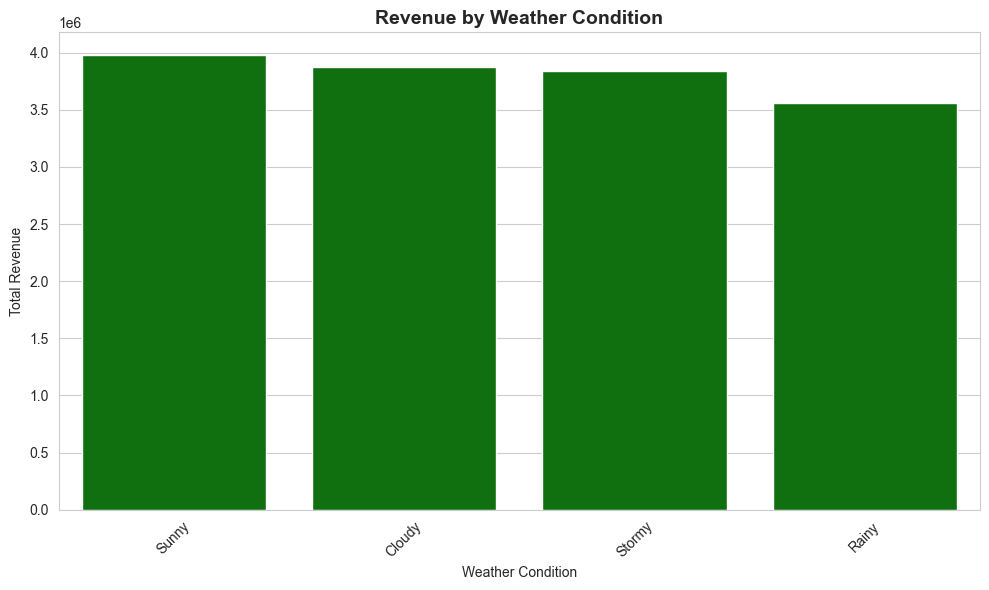

In [212]:
# Calculate revenue by weather
weather_sales = df.groupby('weather_conditions')['revenue'].sum().reset_index()
weather_sales = weather_sales.sort_values(by='revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=weather_sales, x='weather_conditions', y='revenue',color='green')
plt.title('Revenue by Weather Condition', fontsize=14, weight='bold')
plt.xlabel('Weather Condition')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 8. HOW DOES CUSTOMER LOYALTY LEVEL AFFECT PURCHASING PATTERNS?

In [160]:
df.columns

Index(['transaction_id', 'customer_id', 'product_id', 'product_name',
       'category', 'quantity_sold', 'unit_price', 'transaction_date',
       'store_id', 'store_location', 'inventory_level', 'reorder_point',
       'reorder_quantity', 'supplier_id', 'supplier_lead_time', 'customer_age',
       'customer_gender', 'customer_income', 'customer_loyalty_level',
       'payment_method', 'promotion_applied', 'promotion_type',
       'weather_conditions', 'holiday_indicator', 'weekday',
       'stockout_indicator', 'forecasted_demand', 'actual_demand', 'revenue'],
      dtype='object')

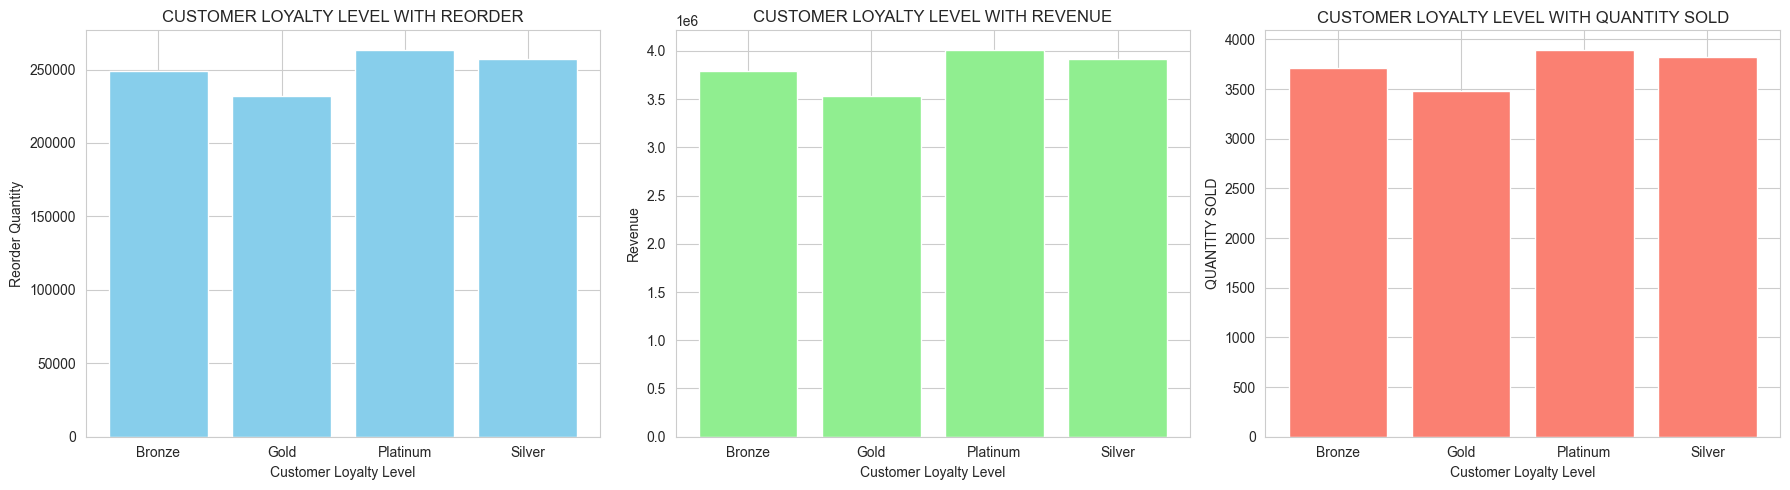

In [169]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

reorder_pattern = df.groupby('customer_loyalty_level')['reorder_quantity'].sum().reset_index()
axs[0].bar(reorder_pattern['customer_loyalty_level'], reorder_pattern['reorder_quantity'], color='skyblue')
axs[0].set_title('CUSTOMER LOYALTY LEVEL WITH REORDER')
axs[0].set_xlabel('Customer Loyalty Level')
axs[0].set_ylabel('Reorder Quantity')

revenue_pattern = df.groupby('customer_loyalty_level')['revenue'].sum().reset_index()
axs[1].bar(revenue_pattern['customer_loyalty_level'], revenue_pattern['revenue'], color='lightgreen')
axs[1].set_title('CUSTOMER LOYALTY LEVEL WITH REVENUE')
axs[1].set_xlabel('Customer Loyalty Level')
axs[1].set_ylabel('Revenue')

revenue_pattern = df.groupby('customer_loyalty_level')['quantity_sold'].sum().reset_index()
axs[2].bar(revenue_pattern['customer_loyalty_level'], revenue_pattern['quantity_sold'], color='salmon')
axs[2].set_title('CUSTOMER LOYALTY LEVEL WITH QUANTITY SOLD')
axs[2].set_xlabel('Customer Loyalty Level')
axs[2].set_ylabel('QUANTITY SOLD')

# Adjust layout
plt.tight_layout()
plt.show()

##### 9. CALCULATE THE MONTHLY SALES AND FIND OUT THE TRENDS.

Text(0, 0.5, 'Revenue')

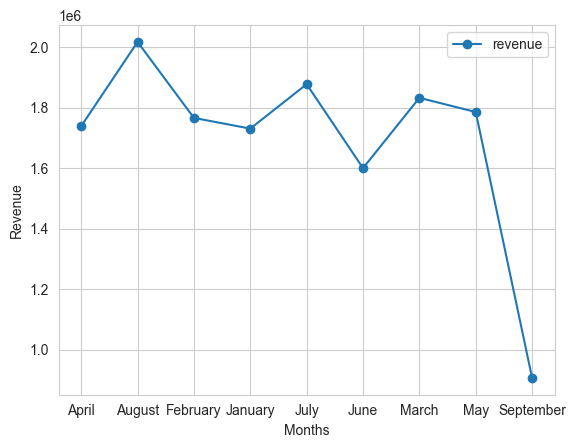

In [191]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['Month'] = df['transaction_date'].dt.month_name()
monthly_sales = df.groupby('Month')['revenue'].sum().reset_index()
monthly_sales.plot(kind='line',x='Month',y='revenue',marker='o')
plt.xlabel('Months')
plt.ylabel('Revenue')

##### WHICH PRODUCT HAS THE BEST PERFORMANCE IN TERMS OF VOLUME?

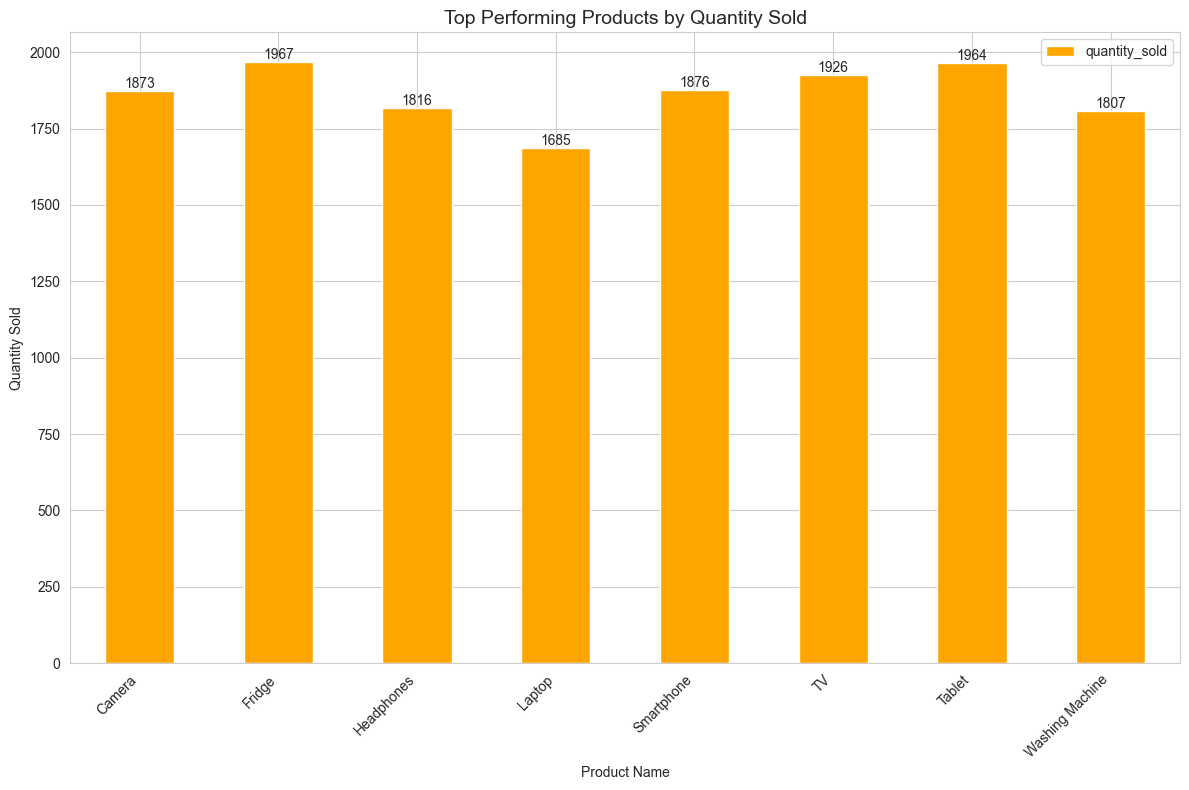

In [211]:
best_product = df.groupby('product_name')['quantity_sold'].sum().reset_index()
bar = best_product.plot(kind='bar',x='product_name', y='quantity_sold', figsize=(12, 8), color='orange')
bar.bar_label(bar.containers[0])
plt.xticks(rotation=45, ha='right')
plt.title('Top Performing Products by Quantity Sold', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.tight_layout()

In [209]:
df.to_csv('Walmart_Sales_Cleaned.csv', index=False)